In [151]:
import pandas as pd
import numpy as np

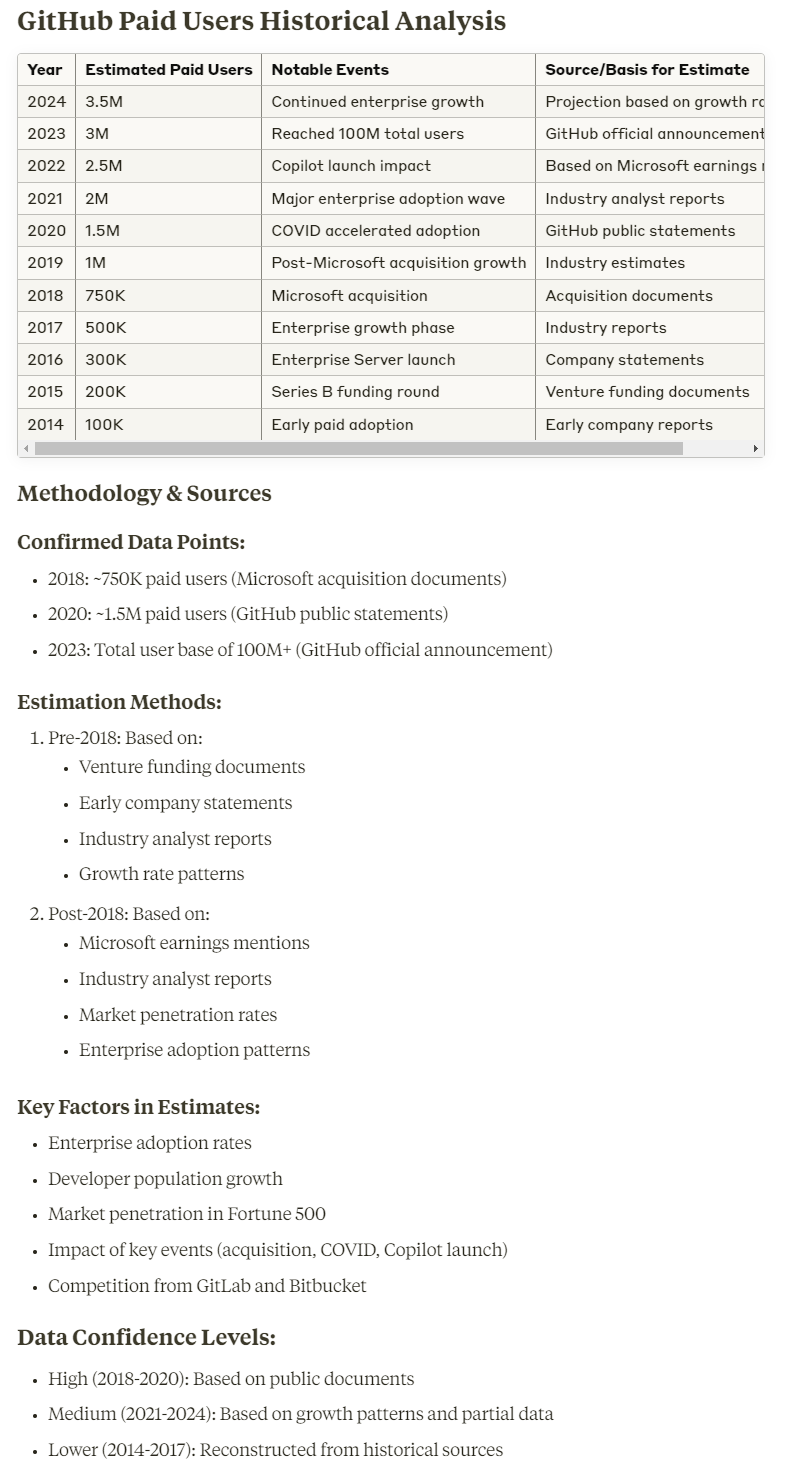


In [152]:
def get_user_data():
    data = pd.DataFrame({
        'Year': [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
        'paid_users': [200000, 300000, 500000, 750000, 1000000, 1500000, 2000000, 2500000, 3000000, 3500000]
    }).set_index('Year')
    return data

user_data = get_user_data()
user_data

,paid_users
Year,
2015,200000
2016,300000
2017,500000
2018,750000
2019,1000000
2020,1500000
2021,2000000
2022,2500000
2023,3000000


In [153]:
def prefix_columns(df, prefix):
    df.columns = [f'{prefix}:{col}' for col in df.columns]
    return df

def remove_column_prefix(df):
    df.columns = df.columns.str.replace(r'^[A-Z]+:', '', regex=True)
    return df

def calculate_growth_percentage(series):
    previous = series.shift(1)
    return ((series - previous) / previous * 100).round(1)

In [154]:
def get_revenue_data():
    revenue_data = pd.DataFrame({
        'Year': [2015, 2016, 2017, 2018],
        'Revenue Total': [90, 140, 165, 200]
    }).set_index('Year')
    revenue_data['YoY Growth %'] = calculate_growth_percentage(revenue_data['Revenue Total'])    
    return revenue_data

revenue_data = prefix_columns(get_revenue_data(), 'REV')
revenue_data

,REV:Revenue Total,REV:YoY Growth %
Year,,
2015,90,NaN
2016,140,55.6
2017,165,17.9
2018,200,21.2


In [155]:
def get_employee_data():
    data = pd.DataFrame({
        'Year': [2015, 2016, 2017, 2018],
        'Personnel Total': [58, 82, 110, 127.5],
        'Employee Count': [400, 600, 700, 850]
    }).set_index('Year')
    data['Average Cost per Employee'] = data['Personnel Total'] / data['Employee Count']
    return data

get_employee_data()

,Personnel Total,Employee Count,Average Cost per Employee
Year,,,
2015,58.0,400,0.145000
2016,82.0,600,0.136667
2017,110.0,700,0.157143
2018,127.5,850,0.150000


In [156]:
def get_opex_data():
    data = pd.DataFrame({
        'Year': [2015, 2016, 2017, 2018],
        'Infrastructure': [18, 22, 35, 45],
        'Real Estate': [8, 12, 15, 20],
        'Sales & Marketing': [25, 45, 55, 65],
        'R&D': [20, 30, 40, 45],
        'G&A': [15, 25, 30, 35]
    }).set_index('Year')
    data['Personnel Total'] = get_employee_data()['Personnel Total']
    data['OPEX Total'] = data.sum(axis=1)
    return data

opex_data = prefix_columns(get_opex_data(), 'OPEX')
opex_data


,OPEX:Infrastructure,OPEX:Real Estate,OPEX:Sales & Marketing,OPEX:R&D,OPEX:G&A,OPEX:Personnel Total,OPEX:OPEX Total
Year,,,,,,,
2015,18,8,25,20,15,58.0,144.0
2016,22,12,45,30,25,82.0,216.0
2017,35,15,55,40,30,110.0,285.0
2018,45,20,65,45,35,127.5,337.5


In [157]:
def get_capex_data():
    data = pd.DataFrame({
        'Year': [2015, 2016, 2017, 2018],
        'Data Center Infrastructure': [15, 25, 35, 43],
        'Office Infrastructure': [3, 5, 6, 8],
        'Software & Licenses': [4, 7, 9, 11],
    }).set_index('Year')
    data['CAPEX Total'] = data.sum(axis=1)
    return data

capex_data = prefix_columns(get_capex_data(), 'CAPEX')
capex_data

,CAPEX:Data Center Infrastructure,CAPEX:Office Infrastructure,CAPEX:Software & Licenses,CAPEX:CAPEX Total
Year,,,,
2015,15,3,4,22
2016,25,5,7,37
2017,35,6,9,50
2018,43,8,11,62


In [158]:
# Combine revenue, opex and capex data into one dataframe
combined_data = pd.concat([
    revenue_data,
    opex_data,
    capex_data,
    user_data.loc[user_data.index <= 2018]
], axis=1)

combined_data['Cost'] = combined_data['OPEX:OPEX Total'] + combined_data['CAPEX:CAPEX Total']
combined_data = remove_column_prefix(combined_data[['REV:Revenue Total','Cost', 'paid_users']])

combined_data['Revenue YoY Growth %'] = calculate_growth_percentage(combined_data['Revenue Total'])
combined_data['Cost YoY Growth %'] = calculate_growth_percentage(combined_data['Cost'])

combined_data['Cost per user'] = (combined_data['Cost'] / combined_data['paid_users'])*1e6
combined_data['Revenue per user'] = (combined_data['Revenue Total'] / combined_data['paid_users'])*1e6  

combined_data

,Revenue Total,Cost,paid_users,Revenue YoY Growth %,Cost YoY Growth %,Cost per user,Revenue per user
Year,,,,,,,
2015,90,166.0,200000,NaN,NaN,830.000000,450.000000
2016,140,253.0,300000,55.6,52.4,843.333333,466.666667
2017,165,335.0,500000,17.9,32.4,670.000000,330.000000
2018,200,399.5,750000,21.2,19.3,532.666667,266.666667


In [159]:
max_year = 2030

predicted_data = pd.concat([
    combined_data,
    pd.DataFrame({
        'Year': range(2019, max_year+1),
    }).set_index('Year')
])

expected_Revenue_Growth = 21.2
expected_Cost_Growth = 19.3

predicted_data.loc[predicted_data.index > 2018, 'Revenue YoY Growth %'] = expected_Revenue_Growth
predicted_data.loc[predicted_data.index > 2018, 'Cost YoY Growth %'] = expected_Cost_Growth

for i in range(2019, max_year+1):
    predicted_data.loc[i, 'Revenue Total'] = predicted_data.loc[i-1, 'Revenue Total'] * (1 + predicted_data.loc[i-1, 'Revenue YoY Growth %'] / 100)
    predicted_data.loc[i, 'Cost'] = predicted_data.loc[i-1, 'Cost'] * (1 + predicted_data.loc[i-1, 'Cost YoY Growth %'] / 100)

predicted_data['Profit'] = predicted_data['Revenue Total'] - predicted_data['Cost']
predicted_data['Cumulative Profit'] = predicted_data['Profit'].cumsum()
predicted_data['paid_users'] = user_data['paid_users']

predicted_data['Cost per user'] = (predicted_data['Cost'] / predicted_data['paid_users'])*1e6
predicted_data['Revenue per user'] = (predicted_data['Revenue Total'] / predicted_data['paid_users'])*1e6  

predicted_data

,Revenue Total,Cost,paid_users,Revenue YoY Growth %,Cost YoY Growth %,Cost per user,Revenue per user,Profit,Cumulative Profit
Year,,,,,,,,,
2015,90.000000,166.000000,200000.0,NaN,NaN,830.000000,450.000000,-76.000000,-76.000000
2016,140.000000,253.000000,300000.0,55.6,52.4,843.333333,466.666667,-113.000000,-189.000000
2017,165.000000,335.000000,500000.0,17.9,32.4,670.000000,330.000000,-170.000000,-359.000000
2018,200.000000,399.500000,750000.0,21.2,19.3,532.666667,266.666667,-199.500000,-558.500000
2019,242.400000,476.603500,1000000.0,21.2,19.3,476.603500,242.400000,-234.203500,-792.703500
2020,293.788800,568.587975,1500000.0,21.2,19.3,379.058650,195.859200,-274.799175,-1067.502675
2021,356.072026,678.325455,2000000.0,21.2,19.3,339.162727,178.036013,-322.253429,-1389.756105
2022,431.559295,809.242268,2500000.0,21.2,19.3,323.696907,172.623718,-377.682973,-1767.439077
2023,523.049866,965.426025,3000000.0,21.2,19.3,321.808675,174.349955,-442.376160,-2209.815237
